# Vitória de Almeida Oliveira

### Pergunta: Considerando o aumento do Idh no ano de 2006 na maioria dos paises, é correto afirmar que os indices de mortalidade pelo virus HIV e o indice de auxilio a saude de cada pais influenciam o idh?

In [60]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

Lendo os arquivos:

In [61]:
idh = pd.read_excel('Indicator_HDI.xlsx')
hiv = pd.read_excel('Indicator_hiv.xlsx')
aid = pd.read_excel('indicator_aid received % of gni.xlsx')

In [62]:
idh.head(2)

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.23,0.34,0.354,0.363,0.37,0.387,0.398


In [63]:
hiv.head(2)

,Estimated HIV Prevalence% - (Ages 15-49),1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06


In [64]:
aid.head(2)

,Aid received % of GNI,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3.12996,6.191071,3.035259,4.783043,5.661172,5.252922,3.524417,2.375813,2.085262,...,NaN,32.063987,34.780914,43.679755,45.183059,41.711588,56.741227,45.628453,50.853667,40.867669


Selecionando o ano:

In [65]:
inco2006 = idh.loc[:, ['HDI', 2006]]
hiv2006 = hiv.loc[:, ['Estimated HIV Prevalence% - (Ages 15-49)', 2006]]
aid2006 = aid.loc[:, ['Aid received % of GNI', '2006']]

Mudando os indices:

In [66]:
inco_idx = inco2006.set_index('HDI')
hiv_idx = hiv2006.set_index('Estimated HIV Prevalence% - (Ages 15-49)')
aid_idx = aid2006.set_index('Aid received % of GNI')

Renomeando as duas primeiras colunas:

In [67]:
df = inco_idx.join(hiv_idx, how='inner', lsuffix='_idh', rsuffix='_hiv')
df.head(2)
#df 

,2006_idh,2006_hiv
Abkhazia,NaN,NaN
Afghanistan,0.354,NaN


In [68]:
aid_idz = aid_idx.rename(index = str, columns = lambda column: 'aid_' + str(column))

In [69]:
data = df.join(aid_idz, how="inner")

In [70]:
#data.rename(index=str,columns={2006:"2006_aid"})
data.head(2)

,2006_idh,2006_hiv,aid_2006
Abkhazia,NaN,NaN,NaN
Afghanistan,0.354,NaN,41.711588


In [71]:
Datta = data.dropna(thresh = 3)
Datta.head(2)

,2006_idh,2006_hiv,aid_2006
Algeria,0.673,0.1,0.212933
Angola,0.459,1.9,0.434817


Salvando o data frame, execl e csv:

In [72]:
Datta.to_excel('Projeto 1.xlsx', index = True)

In [73]:
Datta.to_csv('Projeto 1.csv', index = True)

In [74]:
#Datta.rename(index=str,columns={2006:"2006_aid"})
Datta.head(2)

,2006_idh,2006_hiv,aid_2006
Algeria,0.673,0.1,0.212933
Angola,0.459,1.9,0.434817


Equação da Reta, será utlizada após plotar os gráficos:

In [75]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('2006')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

In [86]:
def linha(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('2006')
    plt.xlabel('AID')
    plt.ylabel('IDH')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

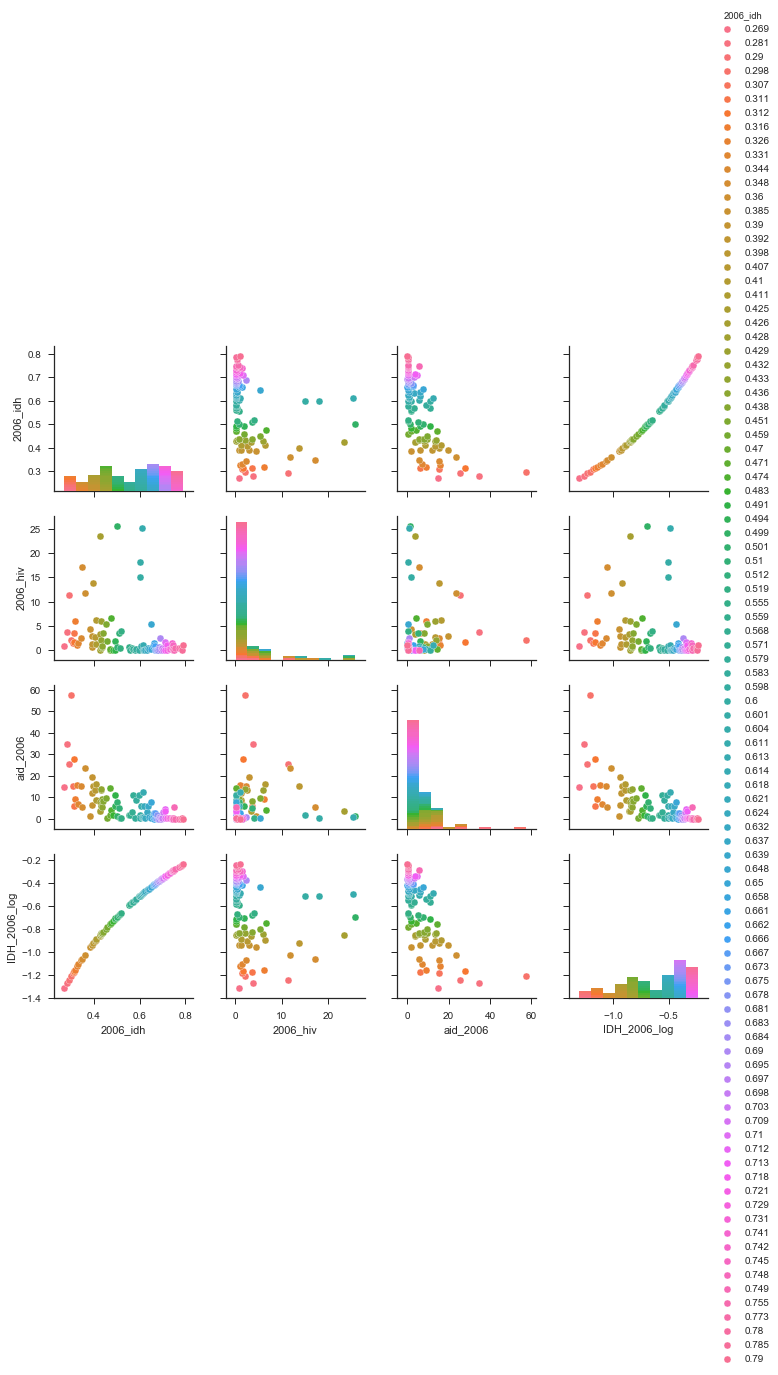

In [87]:
sns.set(style = 'ticks')
sns.pairplot(Datta, hue = '2006_idh')

In [88]:
Datta["IDH_2006_log"]=np.log(Datta['2006_idh'])

C:\Users\vitor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Ajuste linear entre X3 e X4:
Coeficiente linear: -0.4786659529061846
Coeficiente angular: -0.02396991240848577


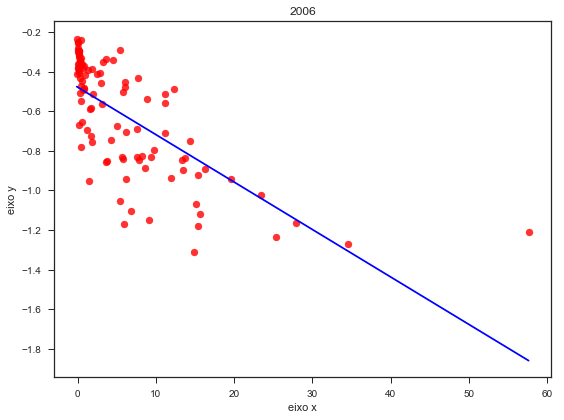

In [89]:
reta(Datta['aid_2006'], Datta['IDH_2006_log'])

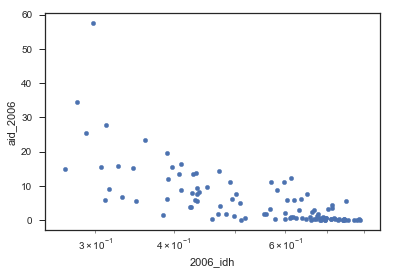

In [90]:
Datta.plot.scatter(x = '2006_idh', y = 'aid_2006' , logx = True)

Ajuste linear entre X3 e X4:
Coeficiente linear: 27.678429963389966
Coeficiente angular: -38.803005182177266


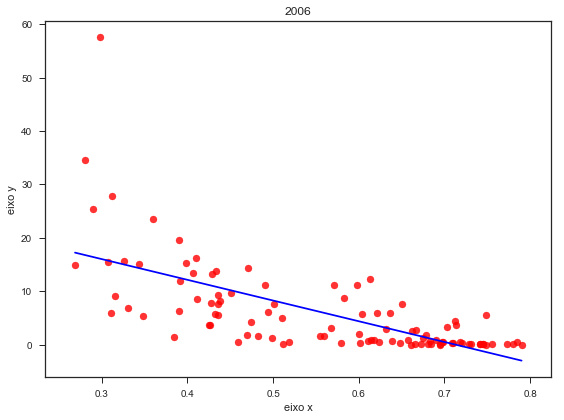

In [91]:
reta(Datta['2006_idh'], Datta['aid_2006'])

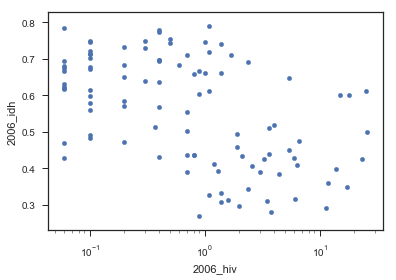

In [92]:
Datta.plot.scatter(x = '2006_hiv', y = '2006_idh' , logx = True)

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5798367214645495
Coeficiente angular: -0.008092423821407499


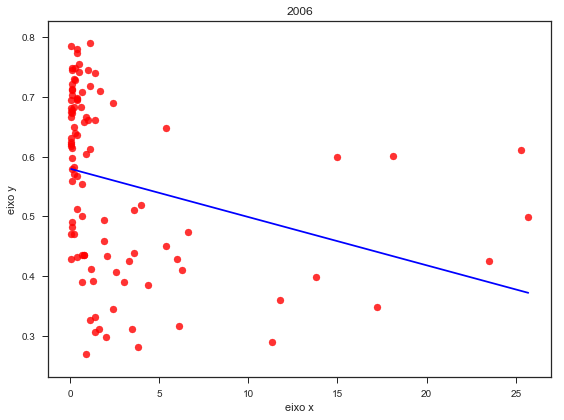

In [93]:
reta(Datta['2006_hiv'], Datta['2006_idh'])

C:\Users\vitor\Anaconda3\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


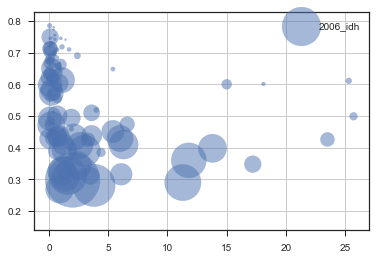

In [94]:

x = Datta['2006_hiv']
y = Datta['2006_idh']
area = Datta['aid_2006']/Datta['aid_2006'].max()* 3000

plt.scatter(x, y, s=area, alpha=0.5)
plt.title = ('2006')
plt.xlabel = ('IDH')
plt.ylabel = ('HIV')
plt.grid(True)
plt.legend()
plt.show()


In [95]:
Datta.corr()

,2006_idh,2006_hiv,aid_2006,IDH_2006_log
2006_idh,1.000000,-0.288590,-0.670607,0.991673
2006_hiv,-0.288590,1.000000,0.087511,-0.272768
aid_2006,-0.670607,0.087511,1.000000,-0.704281
IDH_2006_log,0.991673,-0.272768,-0.704281,1.000000
